<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/HW2_20183127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

**Original model**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 45ms/step - loss: 0.5176 - accuracy: 0.7963 - val_loss: 0.4066 - val_accuracy: 0.8565
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3138 - accuracy: 0.8990 - val_loss: 0.3127 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2329 - accuracy: 0.9251 - val_loss: 0.2811 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1859 - accuracy: 0.9389 - val_loss: 0.3107 - val_accuracy: 0.8737
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1523 - accuracy: 0.9507 - val_loss: 0.2784 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1283 - accuracy: 0.9600 - val_loss: 0.2847 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1067 - accuracy: 0.9668 - val_loss: 0.3073 - val_accuracy: 0.8847
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [13]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [15]:
#model2.compile()

model2.compile(optimizer = "rmsprop",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"])



#model2.fit()

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))



Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.4700 - accuracy: 0.7977 - val_loss: 0.3505 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2700 - accuracy: 0.9053 - val_loss: 0.2962 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1972 - accuracy: 0.9327 - val_loss: 0.2800 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1606 - accuracy: 0.9447 - val_loss: 0.3086 - val_accuracy: 0.8781
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1254 - accuracy: 0.9597 - val_loss: 0.2937 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0987 - accuracy: 0.9696 - val_loss: 0.3315 - val_accuracy: 0.8735
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0812 - accuracy: 0.9762 - val_loss: 0.3739 - val_accuracy: 0.8675
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

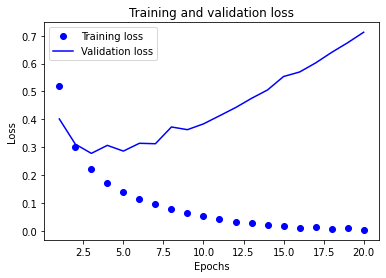

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [17]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model

model2_dr.compile(optimizer = "rmsprop",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

history_dropout = model2_dr.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512, 
                                validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6277 - accuracy: 0.6390 - val_loss: 0.5014 - val_accuracy: 0.8388
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5049 - accuracy: 0.7605 - val_loss: 0.3704 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4162 - accuracy: 0.8201 - val_loss: 0.3180 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3565 - accuracy: 0.8497 - val_loss: 0.2889 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3076 - accuracy: 0.8730 - val_loss: 0.2755 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2701 - accuracy: 0.8953 - val_loss: 0.2730 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2331 - accuracy: 0.9104 - val_loss: 0.2756 - val_accuracy: 0.8912
Epoch 8/20
30

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [18]:
## Add l1 regularization on the second dense layers 

from tensorflow.keras import regularizers


model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu", 
                 kernel_regularizer = regularizers.l1(0.002)),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])


### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [19]:
# finish the training

model2.compile(optimizer = "rmsprop",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"])

history_l1_reg = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0182 - accuracy: 0.9957 - val_loss: 0.7607 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7856 - val_accuracy: 0.8664
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 8.1450e-04 - accuracy: 1.0000 - val_loss: 0.8504 - val_accuracy: 0.8623
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.8789 - val_accuracy: 0.8651
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 3.8803e-04 - accuracy: 1.0000 - val_loss: 0.9056 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 2.9686e-04 - accuracy: 1.0000 - val_loss: 0.9657 - val_accuracy: 0.8584
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 1.0124 - val_accuracy: 0.8622
E

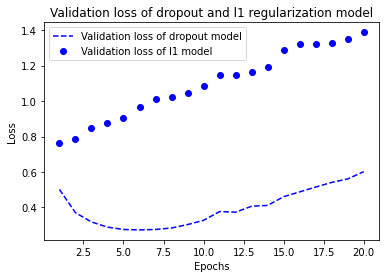

In [28]:
# Visualization of dropout and l1 regularization model

import matplotlib.pyplot as plt


# history_dict = history.history                                                  # for the original model
history_dict_dr = history_dropout.history
history_dict_l1 = history_l1_reg.history

# val_loss_values = history_dict["val_loss"]
val_loss_values_dr = history_dict_dr["val_loss"]
val_loss_values_l1 = history_dict_l1["val_loss"]
epochs = range(1, len(val_loss_values) + 1)

# plt.plot(epochs, val_loss_values, "b", label="Validation loss of original model")
plt.plot(epochs, val_loss_values_dr, "b--", label="Validation loss of dropout model")
plt.plot(epochs, val_loss_values_l1, "bo", label="Validation loss of l1 model")
plt.title("Validation loss of dropout and l1 regularization model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot above is the validation loss of dropout and l1 regularization model. 

- **Dropout model** seems to be overfitted since the validaion loss increases drastically. 
- On the other hand, **l1 regularization model** is more robust than dropout model. Overfitting starts later(at epoch #5) than dropout model(at epoch #2).

In conclusion, l1 regularized model performs better than dropout model.